<a href="https://colab.research.google.com/github/mohripan/Machine-Learning/blob/main/RockPaperScissorsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

from torch.utils.data import DataLoader

In [116]:
class CNN(nn.Module):
  def __init__(self, in_channels=3, num_classes=3):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = in_channels, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))
    self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2))
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(33152, 256)
    self.fc2 = nn.Linear(256, num_classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = self.pool(X)
    X = F.relu(self.conv2(X))
    X = self.pool(X)
    X = self.flatten(X)
    X = F.relu(self.fc1(X))
    X = self.fc2(X)
    
    return X

In [117]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [118]:
model = CNN().to(device)

In [119]:
num_epochs = 10
learning_rate = 0.001
batch_size = 32

In [120]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [121]:
path = 'drive/MyDrive/Belajar DS/Computer Vision/rockpaperscissors'

transform_dict = {'src': transforms.Compose([transforms.Resize(150),
                                            transforms.ToTensor()])}

dataset = datasets.ImageFolder(path, transform=transform_dict['src'])
train_size = round(len(dataset) - len(dataset)*0.4)
test_size = len(dataset)-train_size
train_set, val_set = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
test_loader = DataLoader(val_set, shuffle=False, batch_size=32)
print(train_size)
print(test_size)

1313
875


In [122]:
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

acc = 0
val_acc = 0

for i in range(num_epochs):
  train_loss = []

  num_correct = 0
  num_samples = 0
  model.eval()

  for batch_idx, (data, targets) in enumerate(train_loader):
    optimizer.zero_grad()

    data, targets = data.to(device), targets.to(device)

    score = model(data)
    loss = criterion(score, targets)

    train_loss.append(loss.item())

    _, predictions = score.max(1)
    num_correct += (predictions==targets).sum()
    num_samples += predictions.size(0)

    loss.backward()
    optimizer.step()

  train_loss = np.mean(train_loss)
  train_losses[i] = train_loss
  acc = float(num_correct)/float(num_samples)

  test_loss = []

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
      data, targets = data.to(device), targets.to(device)

      score = model(data)
      loss = criterion(score, targets)

      test_loss.append(loss.item())

      _, predictions = score.max(1)
      num_correct = (predictions==targets).sum()
      num_samples = predictions.size(0)

    test_loss = np.mean(test_loss)
    test_losses[i] = test_loss
    val_acc = float(num_correct)/float(num_samples)

  print(f'Epoch: {i+1}/{num_epochs}, train_loss: {train_loss:.4f}, acc: {acc:.4f}, test_loss: {test_loss:.4f}, val_acc: {val_acc:.4f}')

Epoch: 1/10, train_loss: 1.1154, acc: 0.5141, test_loss: 0.7878, val_acc: 0.8182
Epoch: 2/10, train_loss: 0.5787, acc: 0.7898, test_loss: 0.4677, val_acc: 0.9091
Epoch: 3/10, train_loss: 0.4197, acc: 0.8507, test_loss: 0.4681, val_acc: 0.9091
Epoch: 4/10, train_loss: 0.3477, acc: 0.8835, test_loss: 0.4496, val_acc: 0.8182
Epoch: 5/10, train_loss: 0.2290, acc: 0.9261, test_loss: 0.2414, val_acc: 1.0000
Epoch: 6/10, train_loss: 0.1280, acc: 0.9581, test_loss: 0.1853, val_acc: 1.0000
Epoch: 7/10, train_loss: 0.0788, acc: 0.9764, test_loss: 0.1446, val_acc: 1.0000
Epoch: 8/10, train_loss: 0.0573, acc: 0.9848, test_loss: 0.1399, val_acc: 1.0000
Epoch: 9/10, train_loss: 0.0334, acc: 0.9939, test_loss: 0.1494, val_acc: 0.9091
Epoch: 10/10, train_loss: 0.0282, acc: 0.9947, test_loss: 0.1568, val_acc: 1.0000


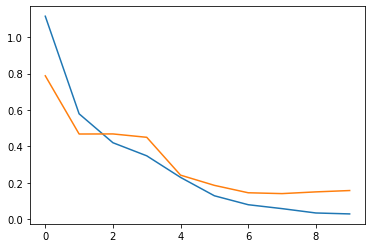

In [123]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')

In [124]:
import PIL.Image as Image
import cv2

Saving GUpnzDfAkw6bmia1.png to GUpnzDfAkw6bmia1.png
Rock


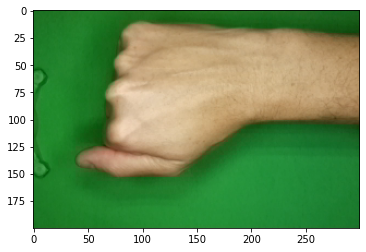

In [128]:
uploaded = files.upload()
loader = transforms.Compose([transforms.Resize(150), transforms.ToTensor()])

for fn in uploaded.keys():
  path = fn
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
  imgplot = plt.imshow(img)

  image = Image.fromarray(img)

  X = loader(image).float()
  X = Variable(X, requires_grad=False)
  X = X.unsqueeze(0)
  X = X.to(device)

  with torch.no_grad():
    score = model(X)
    _, predictions = score.max(1)
    if predictions[0] == 0:
      print('Paper')
    elif predictions[0] == 1:
      print('Rock')
    else:
      print('Scissors')